# TP 1 Individual

## Alumno: Scordamaglia Ezequiel

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, ElasticNetCV, LogisticRegression, LogisticRegressionCV, SGDClassifier, SGDRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import KMeansSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE



# ANALISIS EXPLORATORIO

In [4]:
df = pd.read_csv('data\PS_20174392719_1491204439457_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [7]:
# Elimino la columna isFlaggedFraud, ya que mi targuet es isFraud
df.drop(columns=['isFlaggedFraud'], axis=1, inplace=True)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [8]:
#REVISO VALORES FALTANTES
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

### No hay valores faltantes en el dataset

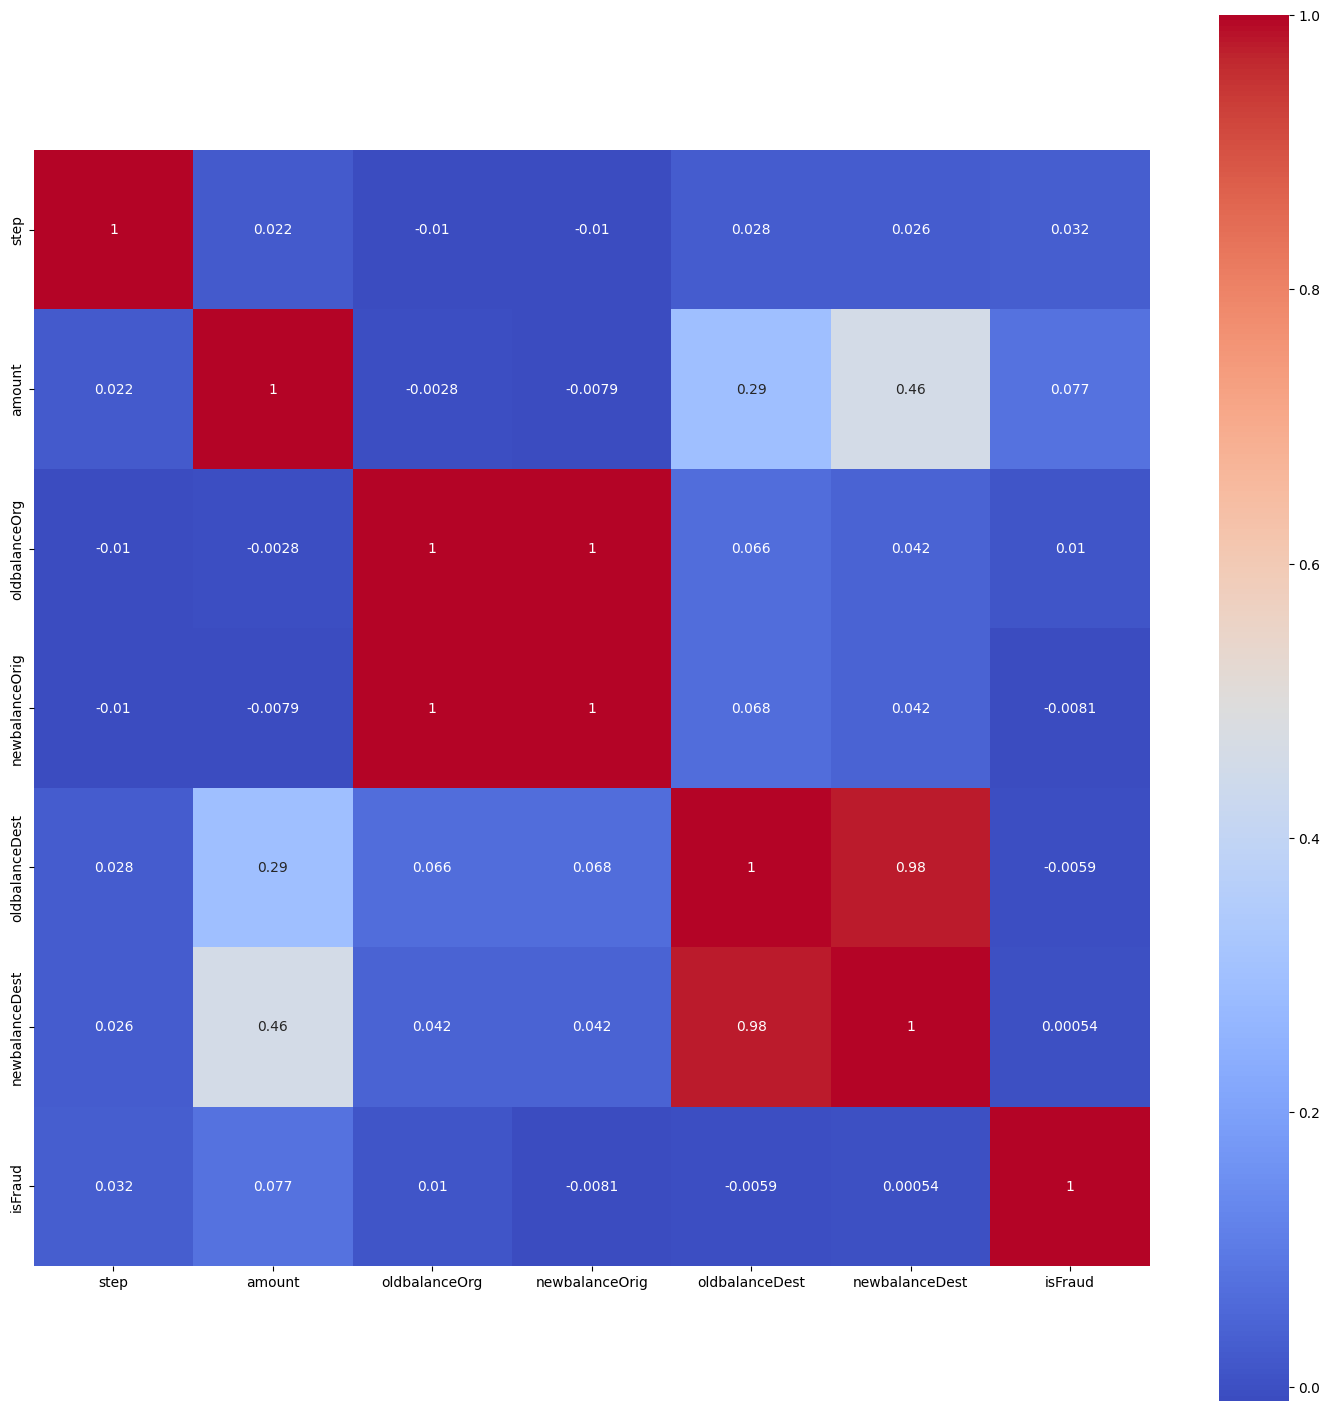

In [9]:
#MATRIZ DE CORRELACIÓN ENTRE VARIABLES NUMÉRICAS
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
# crear la matriz de correlación
corr_matrix = numerical_columns.corr()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 18))
sns.heatmap(corr_matrix,square = True, ax = ax, annot=True, cmap = 'coolwarm')
ax.tick_params(labelsize = 10)

#### Solo hay alta correlacion entre los saldos de las cuentas antes y despues de la transaccion

# PREPROCESAMIENTO DE LOS DATOS

## SEPARACIÓN EN TRAIN Y TEST

In [10]:
#Reviso el porcentaje de cada clase en la variable isFraud
counts = df['isFraud'].value_counts()
print(counts)
percentages = counts / counts.sum() * 100
print(percentages)

0    6354407
1       8213
Name: isFraud, dtype: int64
0    99.870918
1     0.129082
Name: isFraud, dtype: float64


In [11]:
# DIVIDO EL DATASET EN TRAIN Y TEST
target = df['isFraud']
df = df.drop('isFraud', axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(df, target, test_size = 0.25, 
                                                    random_state = 23, stratify=target)

In [12]:
#Reviso el porcentaje de cada clase en la variable isFraud en cada conjunto
print("Y_train")
counts = Y_train.value_counts()
print(counts)
percentages = counts / counts.sum() * 100
print(percentages)


Y_train
0    4765805
1       6160
Name: isFraud, dtype: int64
0    99.870913
1     0.129087
Name: isFraud, dtype: float64


In [13]:
print("Y_test");
counts = Y_test.value_counts()
print(counts)
percentages = counts / counts.sum() * 100
print(percentages)

Y_test
0    1588602
1       2053
Name: isFraud, dtype: int64
0    99.870934
1     0.129066
Name: isFraud, dtype: float64


#### No se pierde la proporcion de valores de cada clase

In [14]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4771965, 9)
(1590655, 9)
(4771965,)
(1590655,)


In [15]:
X_train.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
1785191,162,PAYMENT,10594.29,C1167121278,21441.0,10846.71,M781844579,0.00,0.00
4435871,323,CASH_IN,15336.57,C989181223,32625.0,47961.57,C379566628,404935.06,389598.49
2783977,214,PAYMENT,1989.23,C2114146813,304313.0,302323.77,M835293507,0.00,0.00
473884,19,CASH_OUT,197391.78,C727751316,0.0,0.00,C474198775,392053.74,727668.62
203854,13,CASH_OUT,398538.19,C233833771,29287.0,0.00,C1937196092,1890494.51,2289032.70


## ENCODING

In [16]:
X_train.describe(include='O')

,type,nameOrig,nameDest
count,4771965,4771965,4771965
unique,5,4766742,2151411
top,CASH_OUT,C1976208114,C248609774
freq,1677674,3,85


### Hay tres columnas de datos categóricos

### TYPE

In [17]:
X_train.type.unique()

array(['PAYMENT', 'CASH_IN', 'CASH_OUT', 'TRANSFER', 'DEBIT'],
      dtype=object)

In [18]:
# GENERO UNA COLUMNA POR CADA TIPO DE TRANSACCIÓN
X_train = pd.get_dummies(X_train, columns=['type'], dtype=bool)
X_train.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
1785191,162,10594.29,C1167121278,21441.0,10846.71,M781844579,0.00,0.00,False,False,False,True,False
4435871,323,15336.57,C989181223,32625.0,47961.57,C379566628,404935.06,389598.49,True,False,False,False,False
2783977,214,1989.23,C2114146813,304313.0,302323.77,M835293507,0.00,0.00,False,False,False,True,False
473884,19,197391.78,C727751316,0.0,0.00,C474198775,392053.74,727668.62,False,True,False,False,False
203854,13,398538.19,C233833771,29287.0,0.00,C1937196092,1890494.51,2289032.70,False,True,False,False,False


### NAMEORIGIN Y NAMEDEST

In [19]:
# Solo me quedo con el tipo del nameOrig
X_train['nameOrig_type'] = X_train['nameOrig'].str.slice(stop=1)

#Descarto el numero del campo nameOrig porque no aporta informacion
#X_train['nameOrig_num'] = X_train['nameOrig'].str.slice(start=1)

# Solo me quedo con el tipo del nameDest
X_train['nameDest_type'] = X_train['nameDest'].str.slice(stop=1)

#Descarto el numero del campo namedest porque no aporta informacion
#X_train['nameDest_num'] = X_train['nameDest'].str.slice(start=1)

X_train.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameOrig_type,nameDest_type
1785191,162,10594.29,C1167121278,21441.0,10846.71,M781844579,0.00,0.00,False,False,False,True,False,C,M
4435871,323,15336.57,C989181223,32625.0,47961.57,C379566628,404935.06,389598.49,True,False,False,False,False,C,C
2783977,214,1989.23,C2114146813,304313.0,302323.77,M835293507,0.00,0.00,False,False,False,True,False,C,M
473884,19,197391.78,C727751316,0.0,0.00,C474198775,392053.74,727668.62,False,True,False,False,False,C,C
203854,13,398538.19,C233833771,29287.0,0.00,C1937196092,1890494.51,2289032.70,False,True,False,False,False,C,C


In [20]:
#Elimino las columnas nameOrig y nameDest que ya fueron reemplazadas por nameOrig_type y nameDest_type
X_train.drop('nameOrig', axis=1, inplace=True)
X_train.drop('nameDest', axis=1, inplace=True)

X_train.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameOrig_type,nameDest_type
1785191,162,10594.29,21441.0,10846.71,0.00,0.00,False,False,False,True,False,C,M
4435871,323,15336.57,32625.0,47961.57,404935.06,389598.49,True,False,False,False,False,C,C
2783977,214,1989.23,304313.0,302323.77,0.00,0.00,False,False,False,True,False,C,M
473884,19,197391.78,0.0,0.00,392053.74,727668.62,False,True,False,False,False,C,C
203854,13,398538.19,29287.0,0.00,1890494.51,2289032.70,False,True,False,False,False,C,C


In [21]:
# GENERO UNA COLUMNA POR CADA TIPO DE ORIGEN Y DESTINO
X_train = pd.get_dummies(X_train, columns=['nameOrig_type', 'nameDest_type'], dtype=bool)
X_train.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameOrig_type_C,nameDest_type_C,nameDest_type_M
1785191,162,10594.29,21441.0,10846.71,0.00,0.00,False,False,False,True,False,True,False,True
4435871,323,15336.57,32625.0,47961.57,404935.06,389598.49,True,False,False,False,False,True,True,False
2783977,214,1989.23,304313.0,302323.77,0.00,0.00,False,False,False,True,False,True,False,True
473884,19,197391.78,0.0,0.00,392053.74,727668.62,False,True,False,False,False,True,True,False
203854,13,398538.19,29287.0,0.00,1890494.51,2289032.70,False,True,False,False,False,True,True,False


In [22]:
#CARACTERISTICAS TOTALES
columns = X_train.columns
len(X_train.columns)

14

## ESTANDARIZACIÓN

In [23]:
scaler = StandardScaler()
X_train_escalado = scaler.fit_transform(X_train)

## PREPROCESAMIENTO DEL DATASET DE TEST

In [24]:
#COPIAR EL DATASET ORIGINAL PARA NO PERDERLO
X_test_amount = X_test['amount']

In [25]:

X_test = pd.get_dummies(X_test, columns=['type'], dtype=bool)
X_test['nameOrig_type'] = X_test['nameOrig'].str.slice(stop=1)
# X_test['nameOrig_num'] = X_test['nameOrig'].str.slice(start=1) #No se usa esta columna ya que no aporta información relevante
X_test['nameDest_type'] = X_test['nameDest'].str.slice(stop=1)
# X_test['nameDest_num'] = X_test['nameDest'].str.slice(start=1) #No se usa esta columna ya que no aporta información relevante
X_test.drop('nameOrig', axis=1, inplace=True)
X_test.drop('nameDest', axis=1, inplace=True)
X_test = pd.get_dummies(X_test, columns=['nameOrig_type', 'nameDest_type'], dtype=bool)

X_test_escalado = scaler.fit_transform(X_test)

In [26]:
#Función que calcula el monto ganado segun las predicciones del modelo
def profit_metric(y_true, y_pred):
    # Obtener el monto de cada transacción
    amount = X_test_amount
    
    # Calcular el monto total de las transacciones correctamente aprobadas
    correct_amount = np.sum(amount[(y_true == 0) & (y_pred == 0)]) * 0.2
    
    # Calcular el monto total de las transacciones fraudulentas no detectadas
    undetected_amount = np.sum(amount[(y_true == 1) & (y_pred == 0)])
    
    # Calcular la métrica
    metric = correct_amount - undetected_amount
    
    return metric

# ENTRENAMIENTOS DE MODELOS SIN BALANCEO

## LogisticRegression (Sin Balanceo)

In [59]:
# Define los posibles valores de los hiperparámetros
param_distributions = {
    'C': [1, 10, 100],
    'max_iter': [500, 1000, 1500],
    'class_weight': ['balanced', None],
}

# Crea el modelo base
base_model = LogisticRegression()

# Define el grid search con validación cruzada
grid_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_distributions,
    scoring='recall',
    cv=3,
    n_jobs=6,
    n_iter=6,
    verbose=3
)

# Realiza la búsqueda de los mejores hiperparámetros
grid_search.fit(X_train_escalado, Y_train)

# Obtiene los resultados
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(best_params)
print(best_score)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'max_iter': 1000, 'class_weight': 'balanced', 'C': 1}
0.9534100633757202


In [60]:
# Evalúa el rendimiento del modelo final en el conjunto de prueba
logr_y_hat = grid_search.predict(X_test_escalado)
test_score = profit_metric(Y_test, logr_y_hat)
cm_lr = confusion_matrix(Y_test, logr_y_hat)

print("Matriz de confusion:")
print(cm_lr)
print("Mejores hiperparámetros:", best_params)
print("Mejor puntaje de la función de costo:", best_score)
print("Puntaje de la función de costo en el conjunto de prueba:", test_score)

Matriz de confusion:
[[1507765   80837]
 [     95    1958]]
Mejores hiperparámetros: {'max_iter': 1000, 'class_weight': 'balanced', 'C': 1}
Mejor puntaje de la función de costo: 0.9534100633757202
Puntaje de la función de costo en el conjunto de prueba: 54283061144.008


In [61]:
print(classification_report(Y_test, logr_y_hat))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1588602
           1       0.02      0.95      0.05      2053

    accuracy                           0.95   1590655
   macro avg       0.51      0.95      0.51   1590655
weighted avg       1.00      0.95      0.97   1590655



### RESULTADO

Buscando los mejores parámetros con RandomizedSearchCV el modelo LigisticRegression logra los siguientes resultados:

```python
Matriz de confusion:
[[1507765   80837]
 [     95    1958]]
Mejores hiperparámetros: {'max_iter': 1000, 'class_weight': 'balanced', 'C': 1}
Mejor puntaje de la función de costo: 0.9534100633757202
Puntaje de la función de costo en el conjunto de prueba: 54283061144.008
```

In [119]:
logr = LogisticRegression(max_iter=1000, class_weight="balanced", C=100, n_jobs=-1)
logr.fit(X_train,Y_train)

LogisticRegression(C=100, class_weight='balanced', max_iter=1000, n_jobs=-1)

In [120]:
# Evalúa el rendimiento del modelo final en el conjunto de prueba
logr_y_hat = logr.predict(X_test_escalado)
test_score = profit_metric(Y_test, logr_y_hat)
cm_lr = confusion_matrix(Y_test, logr_y_hat)

print("Matriz de confusion:")
print(cm_lr)
print("Mejores hiperparámetros:", best_params)
print("Mejor puntaje de la función de costo:", best_score)
print("Puntaje de la función de costo en el conjunto de prueba:", test_score)

Matriz de confusion:
[[1507747   80855]
 [     90    1963]]
Mejores hiperparámetros: {'max_iter': 1500, 'class_weight': 'balanced', 'C': 100}
Mejor puntaje de la función de costo: 0.9627344831927483
Puntaje de la función de costo en el conjunto de prueba: 54333583388.11802


## LogisticRegressionCV (Sin Balanceo)

In [50]:
logr = LogisticRegressionCV(cv=5, scoring='recall', n_jobs=4, max_iter=2000)
logr.fit(X_train_escalado,Y_train)

LogisticRegressionCV(cv=5, max_iter=2000, n_jobs=4, scoring='recall')

In [51]:
# Evalúa el rendimiento del modelo final en el conjunto de prueba
logr_y_hat = logr.predict(X_test_escalado)
test_score = profit_metric(Y_test, logr_y_hat)
cm_lr = confusion_matrix(Y_test, logr_y_hat)

print("Matriz de confusion:")
print(cm_lr)
print("Puntaje de la función de costo en el conjunto de prueba:", test_score)

Matriz de confusion:
[[1588510      92]
 [   1033    1020]]
Puntaje de la función de costo en el conjunto de prueba: 56395224214.32601


In [ ]:
print(classification_report(Y_test, logr_y_hat))

### RESULTADO
Entrenando un modelo de LogisticRegressionCV se logran los siguientes resultados:

```python
Matriz de confusion:
[[1588510      92]
 [   1033    1020]]
Puntaje de la función de costo en el conjunto de prueba: 56395224214.32601
```

## RandomForest (Sin Balanceo)

In [64]:
# Define los posibles valores de los hiperparámetros
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [35, 40, 45],
    'class_weight': ['balanced', None],
}

# Crea el modelo base
base_model = RandomForestClassifier()

# Define el grid search con validación cruzada
grid_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_grid,
    scoring='recall',
    cv=4,
    n_jobs=8,
    verbose=3
)

# Realiza la búsqueda de los mejores hiperparámetros
grid_search.fit(X_train_escalado, Y_train)

# Obtiene los resultados
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(best_params)
print(best_score)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
{'n_estimators': 30, 'max_depth': 35, 'class_weight': None}
0.7737012987012988


In [65]:
# Modelo final con los mejores hiperparámetros encontrados
rf_y_hat = grid_search.predict(X_test_escalado)
test_score = profit_metric(Y_test, rf_y_hat)
cm_fr = confusion_matrix(Y_test, rf_y_hat)

print("Matriz de confusion:")
print(cm_fr)
print("Mejores hiperparámetros:", best_params)
print("Mejor puntaje de la función de costo:", best_score)
print("Puntaje de la función de costo en el conjunto de prueba:", test_score)

Matriz de confusion:
[[1588602       0]
 [   1248     805]]
Mejores hiperparámetros: {'n_estimators': 30, 'max_depth': 35, 'class_weight': None}
Mejor puntaje de la función de costo: 0.7737012987012988
Puntaje de la función de costo en el conjunto de prueba: 56174226305.27996


In [66]:
print(classification_report(Y_test, rf_y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588602
           1       1.00      0.39      0.56      2053

    accuracy                           1.00   1590655
   macro avg       1.00      0.70      0.78   1590655
weighted avg       1.00      1.00      1.00   1590655



### RESULTADO

Buscando los mejores parámetros con RandomizedSearchCV el modelo RandomForestClassifier logra los siguientes resultados:

```python
Matriz de confusion:
[[1588602       0]
 [   1248     805]]
Mejores hiperparámetros: {'n_estimators': 30, 'max_depth': 35, 'class_weight': None}
Mejor puntaje de la función de costo: 0.7737012987012988
Puntaje de la función de costo en el conjunto de prueba: 56174226305.27996
```

## RandomForest (Sin Balanceo y Sin Escalar)

In [54]:
rf = RandomForestClassifier(n_estimators = 20, max_depth=50, random_state = 23, n_jobs=6)
rf.fit(X_train, Y_train)


RandomForestClassifier(max_depth=50, n_estimators=20, n_jobs=6, random_state=23)

In [55]:
# Modelo final con los mejores hiperparámetros encontrados
rf_y_hat = rf.predict(X_test)
test_score = profit_metric(Y_test, rf_y_hat)
cm_fr = confusion_matrix(Y_test, rf_y_hat)

print("Matriz de confusion:")
print(cm_fr)
print("Puntaje de la función de costo en el conjunto de prueba:", test_score)

Matriz de confusion:
[[1588572      30]
 [    443    1610]]
Puntaje de la función de costo en el conjunto de prueba: 56564197716.97


### RESULTADO

Entrenando el modelo RandomForestClassifier con el dataset sin escalar y sin balancear se logran los siguientes resultados:

```python
(SIN CLASS_WEIGHT = 'BALANCED')

Matriz de confusion:
[[1588572      30]
 [    440    1613]]
Puntaje de la función de costo en el conjunto de prueba: 56563878298.588005

(CON CLASS_WEIGHT = 'BALANCED')

Matriz de confusion:
[[1588571      31]
 [    455    1598]]
Puntaje de la función de costo en el conjunto de prueba: 56558357684.69201
```

In [75]:
#ANALISIS DE IMPORTANCIA DE CADA COLUMNA SEGUN EL RANDOM FOREST
importances = list(rf.feature_importances_)# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(columns, importances)]# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: oldbalanceOrg        Importance: 0.26
Variable: newbalanceDest       Importance: 0.26
Variable: amount               Importance: 0.17
Variable: step                 Importance: 0.1
Variable: oldbalanceDest       Importance: 0.07
Variable: type_TRANSFER        Importance: 0.06
Variable: newbalanceOrig       Importance: 0.03
Variable: type_CASH_OUT        Importance: 0.02
Variable: type_CASH_IN         Importance: 0.01
Variable: nameDest_type_M      Importance: 0.01
Variable: type_DEBIT           Importance: 0.0
Variable: type_PAYMENT         Importance: 0.0
Variable: nameOrig_type_C      Importance: 0.0
Variable: nameDest_type_C      Importance: 0.0


# BALANCEO DEL DATASET

In [87]:
#Reviso la proporción de valores positivos y negativos antes de balancear
counts = Y_train.value_counts()
print(counts)
percentages = counts / counts.sum() * 100
print(percentages)

0    4765805
1       6160
Name: isFraud, dtype: int64
0    99.870913
1     0.129087
Name: isFraud, dtype: float64


In [88]:
# X_train_balanced = X_train.copy()
# Y_train_balanced = Y_train.copy()

In [103]:
#BALANCEO DE DATASET USANDO OVERSAMPLING
oversample = SMOTE(sampling_strategy=0.005, random_state=43)
X_train_balanced, Y_train_balanced = oversample.fit_resample(X_train, Y_train)

In [90]:
# #BALANCEO DE DATASET USANDO UNDERSAMPLING CON ADASYN
# undersample = ADASYN(sampling_strategy=0.04)
# X_train_balanced, Y_train_balanced = undersample.fit_resample(X_train, Y_train)

In [101]:
# #BALANCEO DE DATASET USANDO UNDERSAMPLING CON BorderlineSMOTE
# undersample = BorderlineSMOTE(sampling_strategy=0.002)
# X_train_balanced, Y_train_balanced = undersample.fit_resample(X_train, Y_train)

In [104]:
#Reviso la proporción de valores positivos y negativos despues del oversampling
counts = Y_train_balanced.value_counts()
print(counts)
percentages = counts / counts.sum() * 100
print(percentages)

0    4765805
1      23829
Name: isFraud, dtype: int64
0    99.502488
1     0.497512
Name: isFraud, dtype: float64


In [105]:
#BALANCEO DEL DATASET USANDO UNDERSAMPLING
undersample = RandomUnderSampler(sampling_strategy=0.005, random_state=43)
X_train_balanced, Y_train_balanced = undersample.fit_resample(X_train_balanced, Y_train_balanced) 

In [ ]:
# #BALANCEO DEL DATASET USANDO UNDERSAMPLING CON NearMiss (17min)
# undersample = NearMiss(version=2, n_neighbors=2, sampling_strategy=0.4)
# X_train_balanced, Y_train_balanced = undersample.fit_resample(X_train_balanced, Y_train_balanced) 

In [ ]:
#BALANCEO DEL DATASET USANDO UNDERSAMPLING CON CNN (NO PROBADO, NUNCA TERMINA DE CORRER)
# undersample = CondensedNearestNeighbour(n_neighbors=1)
# X_train_balanced, Y_train_balanced = undersample.fit_resample(X_train_balanced, Y_train_balanced)

In [106]:
#Reviso la proporción de valores positivos y negativos despues del undersampling
counts = Y_train_balanced.value_counts()
print(counts)
percentages = counts / counts.sum() * 100
print(percentages)

0    4765800
1      23829
Name: isFraud, dtype: int64
0    99.502488
1     0.497512
Name: isFraud, dtype: float64


In [107]:
#ESTANDARIZACION
X_train_balanced_escalado = scaler.fit_transform(X_train_balanced)

# ENTRENAMIENTOS DE MODELOS CON BALANCEO

## LogisticRegressionCV (Con Balance y Estandarización)

In [108]:
logr = LogisticRegressionCV(cv=5, max_iter=2000, n_jobs=8, scoring='recall', random_state=43)
logr.fit(X_train_balanced_escalado,Y_train_balanced)

LogisticRegressionCV(cv=5, max_iter=2000, n_jobs=8, random_state=43,
                     scoring='recall')

In [110]:
# Evalúa el rendimiento del modelo final en el conjunto de prueba
logr_y_hat = logr.predict(X_test_escalado)
test_score = profit_metric(Y_test, logr_y_hat)
cm_lr = confusion_matrix(Y_test, logr_y_hat)

print("Matriz de confusion:")
print(cm_lr)
print("Puntaje de la función de costo en el conjunto de prueba:", test_score)

Matriz de confusion:
[[1588077     525]
 [    794    1259]]
Puntaje de la función de costo en el conjunto de prueba: 56436041481.684006


In [106]:
print(classification_report(Y_test, logr_y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588602
           1       0.87      0.55      0.67      2053

    accuracy                           1.00   1590655
   macro avg       0.93      0.77      0.83   1590655
weighted avg       1.00      1.00      1.00   1590655



### RESULTADO DEL BALANCEO

Entrenando el modelo LogisticRegressionCV con el dataset balanceado se obtienen resultados diversos. La unica vez que mejoró el resultado fue con la configuracion siguiente:

OVERSAMPLING:
SMOTE(sampling_strategy=0.005)

UNDERSAMPLING:
RandomUnderSampler(sampling_strategy=0.01)

Proporcion de las clases: 99/1

Estandarizacion: z = (x - u) / s

Hiperparametros del modelo: cv=5, max_iter=2000, n_jobs=8, scoring='recall'

Matriz de Confusion:
[[1588229	373]
 [799	1254]

Puntaje de la función de costo en el conjunto de prueba: 56461924819.93 




# AUTO ML

Se probó Auto ML en Google Colab pero resultó demasiado lento para trabajar con tantos registros. Se pudo hacer algunas comparaciones pero no se pudo llegar a un mejor resultado que el que se obtuvo realizando todos los pasos manualmente y probando modelos variando sus hiperparametros. 
Se envía en la entrega una planilla de cálculos con las comparaciones de los resultados de los entrenamientos de todos los modelos.


# CONCLUSIÓN FINAL Y MEJOR RESULTADO

Habiendo realizado una analisis exaustivo de varios modelos, se logró el mejor resultado con un RandomForestClassifier, logrando la siguiente matriz de confusión:

- [[1588572	30]
-   [440	1613]]
- Puntaje de la función de costo en el conjunto de prueba: 56,563,878,298.59 

La mejor preparacion de los datos fue la siguiente:
- Escalado: Sin escalar
- Balanceo: Ninguno
- Proporcion de clases: 99.87/0.12
- Proporcion de Train y Test: 75%/25%

Los hiperparametros del modelo fueron los siguientes:
- n_estimators = 20
- max_depth=35

El balanceo por Oversampling y UnderSampling no produjo una mejora en el modelo de RandomForest, pero si mejoro muy poco el modelo de LogisticRegression. Se puede observar en la planilla de calculo de las pruebas realizadas.
